# Credit Card Approval: Supervised Learning

This notebook details the steps taken to apply supervised maching learning (ML) techniques to the credit card approval dataset, provided by the UCI Maching Learning Repository. This was completed by:

1. Conducting an exploratory analysis on the dataset and providing visualizations,
2. Creating an ML pipeline with a linear model,
3. Creating a non-linear model to compare,
4. Creating an ensemble model.

In [50]:
#Import the following libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#Get overview of data. Change column headers to assist in analysis. Column names provided by R. Kuhn, see data file.

df = pd.read_csv("crx.data.csv", names=["Gender","Age", "Debt", "Married", "BankCustomer",
                                       "EducationLevel", "Ethnicity", "YearsEmployed", "PriorDefault",
                                       "Employed", "CreditScore", "DriversLicense", "Citizen", "ZipCode",
                                       "Income", "ApprovalStatus"])
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [52]:
#Check for missing data:

print('CC missing data:')
print(df.isnull().sum())

CC missing data:
Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64


In [53]:
#Check data types:

df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

In [54]:
#Change approval status symbols to 1 and 0:

df['ApprovalStatus'] = df['ApprovalStatus'].replace(['+','-'],['1','0'])

In [55]:
#Replace question marks with zeros:

df['Age'] = df['Age'].replace(['?'],['0'])

In [56]:
#Replace question marks with 'N/A':

df['ZipCode'] = df['ZipCode'].replace(['?'],['N/A'])

In [57]:
#Change the following column data types to strings:

df['YearsEmployed'] = df['YearsEmployed'].astype(str)
df['Debt'] = df['YearsEmployed'].astype(str)

In [58]:
#Get rid of any white space:

df['YearsEmployed'] = df['YearsEmployed'].str.replace(" ","")

In [59]:
df['Debt'] = df['Debt'].str.replace(" ","")

In [60]:
#Change the following column data types to float:

df["Age"] = df.Age.astype(float)
df["Debt"] = df.Debt.astype(float)
df["YearsEmployed"] = df.YearsEmployed.astype(float)

## 1. Data Analysis & Visualizations

Being analyzing the cleansed data and provide visualizations:

In [61]:
df.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.019159,2.223406,2.223406,2.40000,1017.385507
std,12.552078,3.346513,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.000000,0.00000,0.000000
25%,22.440000,0.165000,0.165000,0.00000,0.000000
50%,28.170000,1.000000,1.000000,0.00000,5.000000
75%,37.707500,2.625000,2.625000,3.00000,395.500000
max,80.250000,28.500000,28.500000,67.00000,100000.000000


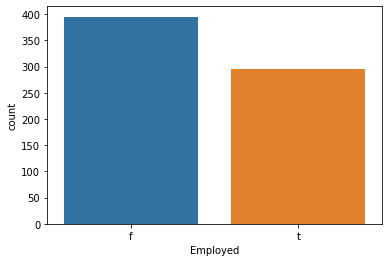

In [62]:
sns.countplot(x='Employed', data=df, order = df['Employed'].value_counts().index)

We can see that more applicants are not employed.

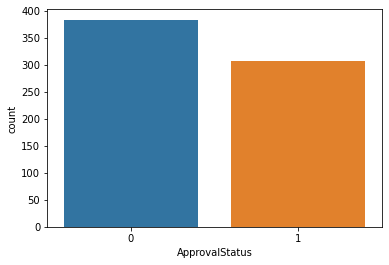

In [63]:
sns.countplot(x='ApprovalStatus', data=df, order = df['ApprovalStatus'].value_counts().index)

More applicants were denied.

In [64]:
df['ApprovalStatus'].value_counts()

0    383
1    307
Name: ApprovalStatus, dtype: int64

Listing the numbers associated with denials and approvals.

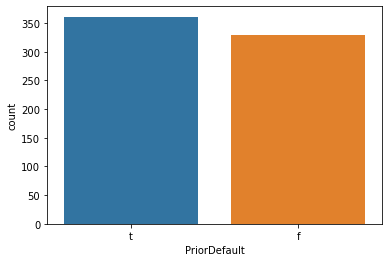

In [65]:
sns.countplot(x='PriorDefault', data=df, order = df['PriorDefault'].value_counts().index)

Many applicants have had prior defaults.

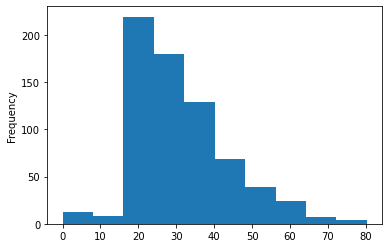

In [66]:
df['Age'].plot.hist()

The age histogram suggests that this dataset contains a younger demographic.

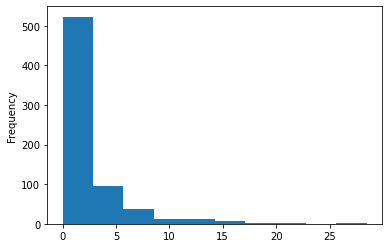

In [67]:
df['YearsEmployed'].plot.hist()

The histogram suggests that many applicants are young employees who do not have as much experience, which is consistent with the demographic earlier.

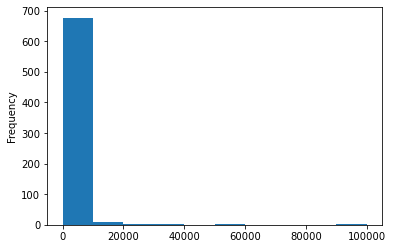

In [68]:
df['Income'].plot.hist()

Income leans towards the lower end of the income distrubtion. This continues the theme of a younger demographic with less work experience.

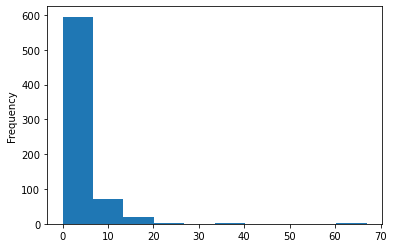

In [69]:
df['CreditScore'].plot.hist()

The histogram suggests that most applicants had lower credit scores.

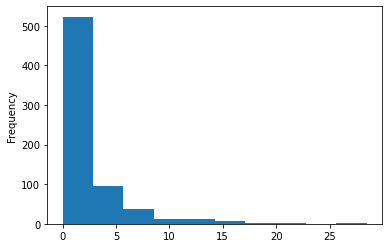

In [70]:
df['Debt'].plot.hist()

In terms of debt, most applicants did not have much debt.

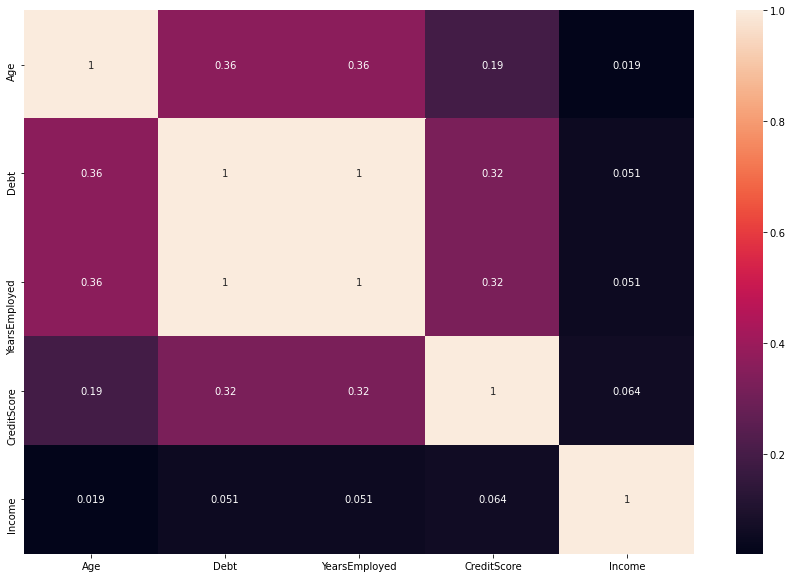

In [71]:
#Create heat map:

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [72]:
#Drop the columns deemed unnecessary:

df.drop(columns=['ZipCode','DriversLicense'], inplace = True)

# Start preparing data for ML

In [73]:
#Import the following:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read the train data:
train_data = df

# Check for any null values:
train_data.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
ApprovalStatus    0
dtype: int64

In [74]:
# Import the following:

from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder:

le = LabelEncoder()

# Iterate over all the values of each column to find out each data type:
for col in df:
    # Compare if the dtype is an object:
    if df[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation:
       df[col]=le.fit_transform(df[col])

In [75]:
df = df.values

In [76]:
# Import train_test_split:

from sklearn.model_selection import train_test_split

# Separate features and label into distinct variables:

X,y = df[:,0:12] , df[:,13]

# Split into train and test datasets:

X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

In [77]:
#Import the following:

from sklearn.preprocessing import MinMaxScaler

# Use Scaler with MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

print(rescaledX_train[:10,:])

[[0.5        0.31700326 0.225      1.         1.         0.5
  0.11111111 0.225      0.         0.         0.         0.        ]
 [1.         0.43752443 0.2125     0.66666667 0.33333333 0.71428571
  0.88888889 0.2125     1.         1.         0.08955224 0.        ]
 [0.         0.42019544 0.0125     0.66666667 0.33333333 0.14285714
  0.88888889 0.0125     0.         0.         0.         0.        ]
 [1.         0.39309446 0.002      1.         1.         0.14285714
  0.88888889 0.002      0.         0.         0.         0.        ]
 [0.5        0.47882736 0.25       0.66666667 0.33333333 0.35714286
  0.88888889 0.25       1.         0.         0.         0.        ]
 [0.5        0.36052117 0.0125     0.66666667 0.33333333 0.92857143
  0.88888889 0.0125     0.         0.         0.         0.        ]
 [1.         0.51035831 0.5        1.         1.         0.5
  0.44444444 0.5        0.         0.         0.         1.        ]
 [1.         0.55374593 0.15825    1.         1.       

## 2. Linear Model

Create an ML pipeline with a linear model. Implemented a logistic regression:

In [78]:
# Import the following:

from sklearn.linear_model import LogisticRegression

# Use a LogisticRegression classifier with default parameter values:

logreg = LogisticRegression()

# Fit logreg to the train set:

logreg.fit(X_train,y_train)

/Applications/anaconda3/envs/pratt_ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [79]:
#Import the following:

from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it

y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model:
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))

# Also get the confusion matrix of the logreg model:
confusion_matrix(y_pred, y_test)

Accuracy of logistic regression classifier:  0.8464912280701754


array([[99,  9],
       [26, 94]])

In [80]:
#Import the following to fit to a pipeline:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, ElasticNetCV
from sklearn.preprocessing import StandardScaler

In [81]:
X_scaled = StandardScaler().fit_transform(X)

X_scaled[:, 0].mean(), X_scaled[:, 0].std()

X[:, 0].mean(), X[:, 0].std()

(1.6608695652173913, 0.5088256987244449)

In [82]:
step_list = [('scaler', StandardScaler()), 
             ('reg', LogisticRegression())
             
            ]
pipe = Pipeline(steps=step_list)

In [83]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', LogisticRegression())])

In [84]:
pipe.score(X_test, y_test)

0.8508771929824561

In [85]:
# Trying pipeline with ElasticNet + CV:

pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                        ('reg', ElasticNetCV(cv=10))
                       ])

In [86]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', ElasticNetCV(cv=10))])

In [87]:
pipe.score(X_test, y_test)

0.5319628446097429

## 3. Non-linear Model

Create a non-linear model to compare. Implemented K nearest neighbors:

In [88]:
#Import the following:

from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [89]:
#Separate features, create labels, and split into train and test datasets:

X,y = df[:,0:12] , df[:,13]
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

#Get score:

print(nca_pipe.score(X_test, y_test))

0.7982456140350878


## 4. Ensemble Methods

Create an ensemble model. Implemented bagging method:

In [90]:
#Import the following:

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            max_samples=0.5, max_features=0.5)

In [91]:
#Fit to train set:

bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)

In [92]:
#Get score:

bagging.score(X_test, y_test)

0.7368421052631579